In [1]:
import h5py
import numpy as np
import os
from datetime import datetime
from collections import defaultdict
import pandas as pd

folder_path = "/srv/data/MOSDAC/INSAT3DR/AOD/ALL"

def extract_aod(file_path):
    try:
        # Extract date from filename
        filename_parts = os.path.basename(file_path).split('_')
        date_str = filename_parts[1]  # This extracts "01APR2023"
        date = np.datetime64(datetime.strptime(date_str, '%d%b%Y').date(), 'D')  

        # Open the HDF5 file and extract data
        with h5py.File(file_path, 'r') as file:
            aod = file['AOD'][:]
            aod[aod == -999] = np.nan  # Replace -999 with NaN
            lat = file['latitude'][:]
            lon = file['longitude'][:]

            # Flatten grids for easy masking
            lat_grid, lon_grid = np.meshgrid(lat, lon, indexing='ij')
            lat_flat = lat_grid.flatten()
            lon_flat = lon_grid.flatten()
            aod_flat = aod.flatten()
            
            # ICIMOD COORDINATES Mask
            #pokhara
            #mask = ((lat_flat >= 28.0900) & (lat_flat <= 28.277100) & (lon_flat >= 83.066908) & (lon_flat <= 83.884092))
            #issykul
            #mask = ((lat_flat >=42.532900) & (lat_flat <=42.713100) & 
                   #(lon_flat >= 76.882495) & (lon_flat <= 77.083505))
            #kanpur
            mask = ((lat_flat >=26.422900 ) & (lat_flat <=26.603100) & 
                    (lon_flat >=80.130933) & (lon_flat <=80.333087))
            #BHOLA
            #mask = ((lat_flat >=22.13900 ) & (lat_flat <=22.317100) & 
                    #(lon_flat >=90.660285) & (lon_flat <=90.85))
            # pune
            #mask = ((lat_flat >=18.446900 ) & (lat_flat <=18.627100) & 
                    #(lon_flat >=73.71462) & (lon_flat <=73.898538))
            #LAHORER
            #mask = ((lat_flat >=31.38990 ) & (lat_flat <=31.570100) & 
                    #(lon_flat >=74.169947) & (lon_flat <=74.358053))
            #karunya
            #mask = ((lat_flat >=10.844900 ) & (lat_flat <=11.025100 ) & 
                    #(lon_flat >=76.649366) & (lon_flat <=76.838634))
            #gandhi college
            #mask = ((lat_flat >=25.780900 ) & (lat_flat <=25.961100 ) & 
                    #(lon_flat >=84.033428) & (lon_flat <=84.222572))
            #IIT DELHI
            #mask = ((lat_flat >=28.454900 ) & (lat_flat <=28.635100 ) & 
                    #(lon_flat >=77.098271) & (lon_flat <=77.287729))
            
                    
            # Apply mask and filter AOD values
                    
            filtered_aod = aod_flat[mask]
            
            return date, filtered_aod
    
    except (OSError, KeyError, IndexError) as e:
        print(f"Error reading file {file_path}: {e}")
        return None, None

# Dictionary to store AOD values by date
aod_dict = defaultdict(list)

# Process all .h5 files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".h5"):
        filename_parts = filename.split('_')
        version_str = filename_parts[-1]  # Extract version part like "V01R00.h5"
        
        if 'V01' in version_str:  # Process only version 1 files
            file_path = os.path.join(folder_path, filename)
            date, filtered_aod = extract_aod(file_path)
            if date is not None and filtered_aod is not None:  # Skip problematic files
                aod_dict[date].extend(filtered_aod)

# Calculate the mean and standard deviation of AOD for each day
#aod_by_day = {date: np.nanmean(aod_list) for date, aod_list in aod_dict.items()}
#std_by_day = {date: np.nanstd(aod_list) for date, aod_list in aod_dict.items()}

aod_by_day = {date: np.mean(np.nan_to_num(aod_list, nan=0)) for date, aod_list in aod_dict.items()}

# Calculate the standard deviation for each day
std_by_day = {date: np.std(np.nan_to_num(aod_list, nan=0)) for date, aod_list in aod_dict.items()}


# Convert results to DataFrames
aod_df = pd.DataFrame(list(aod_by_day.items()), columns=['Date', 'Mean_AOD'])
aod_df1 = pd.DataFrame(list(std_by_day.items()), columns=['Date', 'std'])

# Merge the DataFrames on Date for better clarity
final_df = pd.merge(aod_df, aod_df1, on="Date")

# Display the final result
#print(final_df)

# Save the result to a CSV file
#output_path = os.path.join(folder_path, "filtered_version1_aod_results.csv")
#final_df.to_csv(output_path, index=False)
#print(f"Results saved to {output_path}")


Error reading file /srv/data/MOSDAC/INSAT3DR/AOD/ALL/3RIMG_01JUL2021_0815_L2G_AOD_V01R00.h5: Unable to synchronously open file (truncated file: eof = 131072, sblock->base_addr = 0, stored_eof = 191746)


In [2]:
#  Aeronet data
import pandas as pd
from tabulate import tabulate
#path = "aeronet/kanpur/2023 kanpur.xlsx"
#df = pd.read_excel(path)
#df['Date'] = pd.to_datetime(df['Date(dd:mm:yyyy)'], format='%m/%d/%Y')
#pokhara
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Pokhara.lev15")
#issykul
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Issyk-Kul.lev15")
#kanpur
file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Kanpur.lev15")
#BHOLA
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Bhola.lev15")
#pune
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Pune.lev15")
#LAHORE
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Lahore.lev15")
#karunya
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Karunya_University.lev15")
#gandhi college
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_Gandhi_College.lev15")
#IIT DELHI
#file_path=("/srv/data/Shared/AERONET-AOD-ALL/AOD/AOD15/DAILY/19930101_20240803_IIT_Delhi.lev15")

df = pd.read_csv(file_path, skiprows=6) 
df['Date'] = pd.to_datetime(df['Date(dd:mm:yyyy)'], format='%d:%m:%Y')
df_filtered = df[(df['Date'].dt.year == 2016)|(df['Date'].dt.year == 2017)|(df['Date'].dt.year == 2018)|(df['Date'].dt.year == 2019)|(df['Date'].dt.year == 2020)]
df_selected=df_filtered[["Date","AOD_675nm"]]

# Merge the two DataFrames on the 'Date' column
merged_df = pd.merge(aod_df,df_selected[['Date', 'AOD_675nm']],on='Date',how='outer')
merged_df1=pd.merge(aod_df1,merged_df,on='Date',how='outer')
# Ensure dates are sorted
merged_df = merged_df.sort_values('Date')
merged_df1=merged_df1.sort_values('Date')

# Fill missing AOD values with NaN
merged_df['Mean_AOD'] = merged_df['Mean_AOD'].fillna(np.nan)
merged_df['AOD_675nm'] = merged_df['AOD_675nm'].fillna(np.nan)
merged_df['AOD_675nm'] = pd.to_numeric(merged_df['AOD_675nm'], errors='coerce')

merged_df['AOD_675nm'] = merged_df['AOD_675nm'].replace(-999, np.nan)
# Print the merged DataFrame as a table
df=(tabulate(merged_df1, headers='keys', tablefmt='grid'))
#print(df)
#print(aod_std_by_day)
merged_df1.to_pickle('stations2 pkl/kanpur1.pkl')

In [4]:
# Apply the updated condition
import pandas as pd


merged_df1 = merged_df1[merged_df1['Date'].dt.year <= 2020]

merged_df1['Mean_AOD'] = np.where(
    (merged_df1['Mean_AOD']-merged_df1['AOD_675nm']) <=0.50,merged_df1['Mean_AOD'],np.nan)

# Display the updated DataFrame
from tabulate import tabulate
df2 = tabulate(merged_df1, headers='keys', tablefmt='grid')
#print(df2)

#merged_df1.to_pickle('stations2/gandhicollege.pkl')

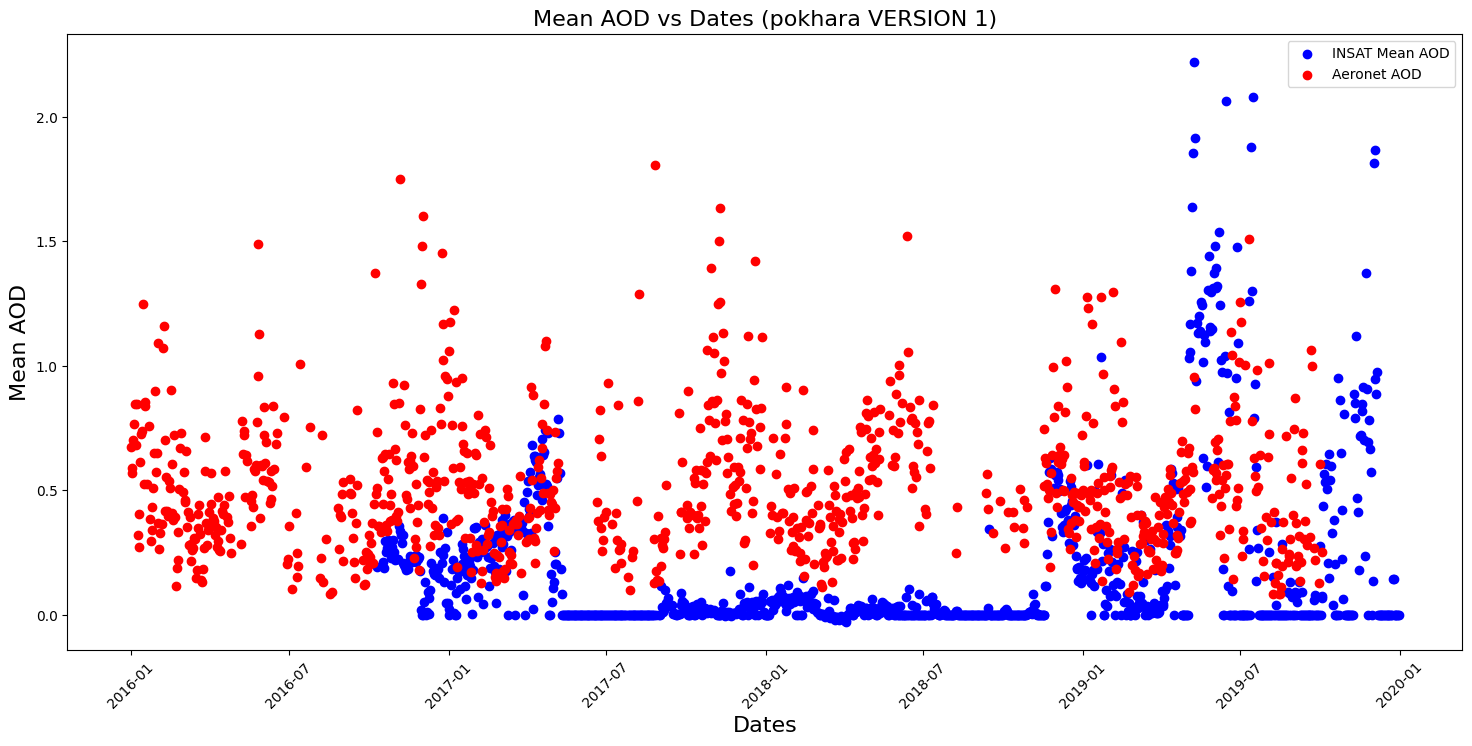

In [6]:
import matplotlib.pyplot as plt


merged_df_filtered = merged_df[merged_df['Date'].dt.year <= 2019]

# Plotting
plt.figure(figsize=(18, 8))
plt.scatter(merged_df_filtered['Date'], merged_df_filtered['Mean_AOD'], color='blue', marker='o', label='INSAT Mean AOD')
plt.scatter(merged_df_filtered['Date'], merged_df_filtered['AOD_675nm'], color='red', marker='o', label='Aeronet AOD')

#plt.plot(merged_df['Date'],merged_df['standard dev'])
# Add title and labels
#plt.title('Mean AOD vs Dates (POKHARA VERSION 1)',size=16)
#plt.title('Mean AOD vs Dates (ISSYKUL VERSION 1)',size=16)
plt.title('Mean AOD vs Dates (pokhara VERSION 1)',size=16)
plt.ylabel('Mean AOD',size=16)
plt.xlabel('Dates',size=16)
plt.legend()\

plt.xticks(rotation=45)
#plt.savefig("insat v1 filtered /pokhara.png", format='png', dpi=300)
#plt.savefig("insatvsaeronet v1 plots/IIT DELHI V1.png", format='png', dpi=300)
plt.show()


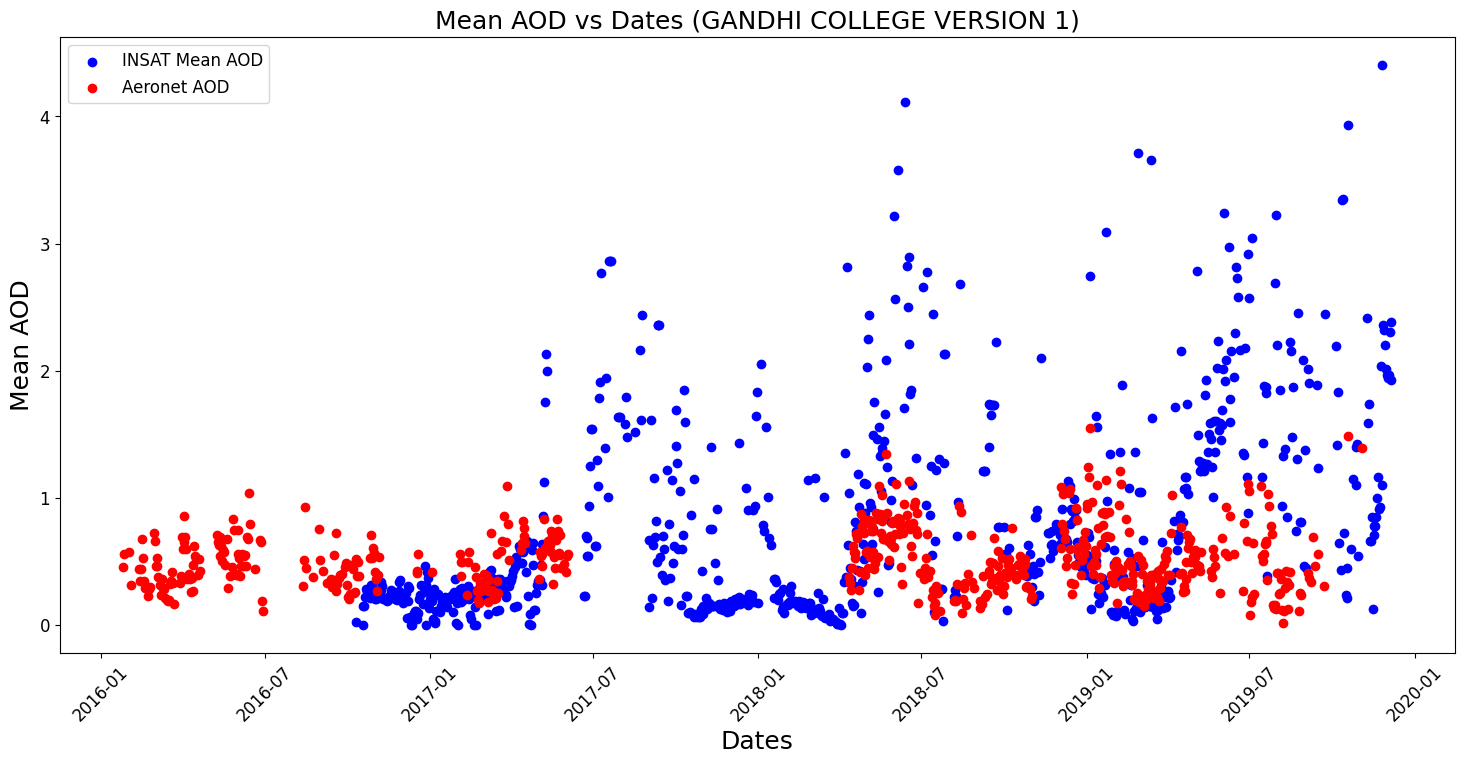

In [5]:
import matplotlib.pyplot as plt

# Filter the data for dates up to 2019
merged_df_filtered = merged_df[merged_df['Date'].dt.year <= 2019]

# Set publication-quality font sizes
plt.rcParams.update({
    'axes.labelsize': 14,       # Axis labels
    'axes.titlesize': 16,       # Title size
    'xtick.labelsize': 12,      # X-tick labels
    'ytick.labelsize': 12,      # Y-tick labels
    'legend.fontsize': 12,      # Legend size
    'figure.titlesize': 18,     # Figure title size
    'font.family':'Sans Serif'     # Font style (use 'Times New Roman' or 'Helvetica' as  )
})

# Plotting
plt.figure(figsize=(18, 8))
plt.scatter(merged_df_filtered['Date'], merged_df_filtered['Mean_AOD'], color='blue', marker='o', label='INSAT Mean AOD')
plt.scatter(merged_df_filtered['Date'], merged_df_filtered['AOD_675nm'], color='red', marker='o', label='Aeronet AOD')

# Add title and labels
plt.title('Mean AOD vs Dates (GANDHI COLLEGE VERSION 1)', size=18)
plt.ylabel('Mean AOD', size=18)
plt.xlabel('Dates', size=18)
plt.legend()

# Rotate x-ticks for better readability
plt.xticks(rotation=45)

# Save the plot as a high-resolution PNG file
#plt.savefig("insat v1 filtered /GANDHI COLLEGE.png", format='png', dpi=300)

# Display the plot
plt.show()


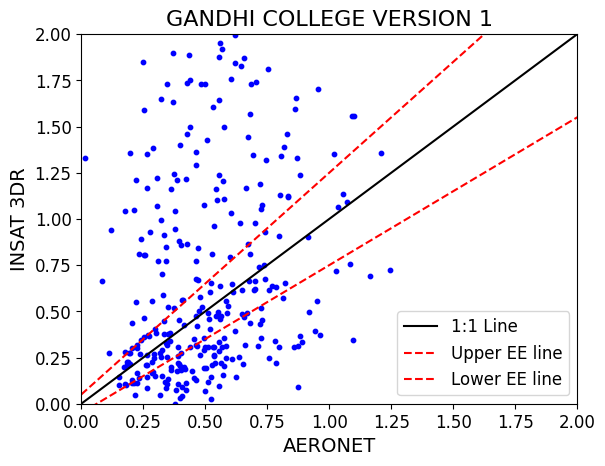

In [6]:
import matplotlib.pyplot as plt
import numpy as np
#upper_bound = (merged_df["AOD_675nm"] * 0.20) + 0.50
#lower_bound = -(upper_bound)

#  1:1 line(if insat and aeronet have same values)
x = np.linspace(0, 3, 100) 
y = x

plt.plot(x, y, label='1:1 Line', color='black', linestyle='-')
#expected error
ee_envelope = 0.20*x + 0.05
plt.plot(x,x+ ee_envelope, 'r--', label='Upper EE line')
plt.plot(x,x - ee_envelope, 'r--', label='Lower EE line')

# Plot the data points
plt.scatter(merged_df['AOD_675nm'], merged_df['Mean_AOD'], color='blue', marker='o', s=10)

plt.title("GANDHI COLLEGE VERSION 1")
plt.xlim(0,2)
plt.ylim(0,2)
plt.xlabel("AERONET")
plt.ylabel("INSAT 3DR")
plt.legend()
plt.savefig("insat v1 filtered /scatter plots v1/GANDHI COLLEGE.png", format='png', dpi=300) 
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
import numpy as np

# Define the range for x (AERONET values)
x = np.linspace(0, 3.5, 821)

upper_bound = x + (0.20 * x + 0.05)
lower_bound = x - (0.20 * x + 0.05)

# Initialize 
num_within_bounds = 0
points_within_bounds = []

for i in range(len(merged_df)):
    aeronet_value = merged_df['AOD_675nm'].iloc[i]
    insat_value = merged_df['Mean_AOD'].iloc[i]
    
    # Find the closest x value to the current AERONET value
    closest_index = (np.abs(x - aeronet_value)).argmin()
    
    # Get the corresponding bounds for that x value
    current_upper_bound = upper_bound[closest_index]
    current_lower_bound = lower_bound[closest_index]
    
    # Check if the INSAT value falls within the bounds
    if current_lower_bound <= insat_value <= current_upper_bound:
        points_within_bounds.append((aeronet_value, insat_value))
        num_within_bounds += 1

print(f"Number of data points within the EE envelope: {num_within_bounds}")


Number of data points within the EE envelope: 151


In [13]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

num_within_bounds = 0
points_within_bounds = []

aeronet_within_bounds = []
insat_within_bounds = []


for i in range(len(merged_df)):
    aeronet_value = merged_df['AOD_675nm'].iloc[i]
    insat_value = merged_df['Mean_AOD'].iloc[i]
    
    # Skip if value is NaN
    if np.isnan(aeronet_value) or np.isnan(insat_value):
        continue
    closest_index = (np.abs(x - aeronet_value)).argmin()

    current_upper_bound = upper_bound[closest_index]
    current_lower_bound = lower_bound[closest_index]
    
    if current_lower_bound <= insat_value <= current_upper_bound:
        points_within_bounds.append((aeronet_value, insat_value))
        aeronet_within_bounds.append(aeronet_value)
        insat_within_bounds.append(insat_value)
        num_within_bounds += 1

# Print the number of data points within the EE envelope
print(f"Number of data points within the EE envelope: {num_within_bounds}")

# Calculate and print r and RMSE if there are enough data points
if len(aeronet_within_bounds) > 1 and len(insat_within_bounds) > 1:
    r_value, _ = pearsonr(aeronet_within_bounds, insat_within_bounds)
    rmse = np.sqrt(mean_squared_error(aeronet_within_bounds, insat_within_bounds))
    print(f"correlation coefficient (r): {r_value:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


Number of data points within the EE envelope: 113
correlation coefficient (r): 0.898
Root Mean Squared Error (RMSE): 0.083
